In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

151


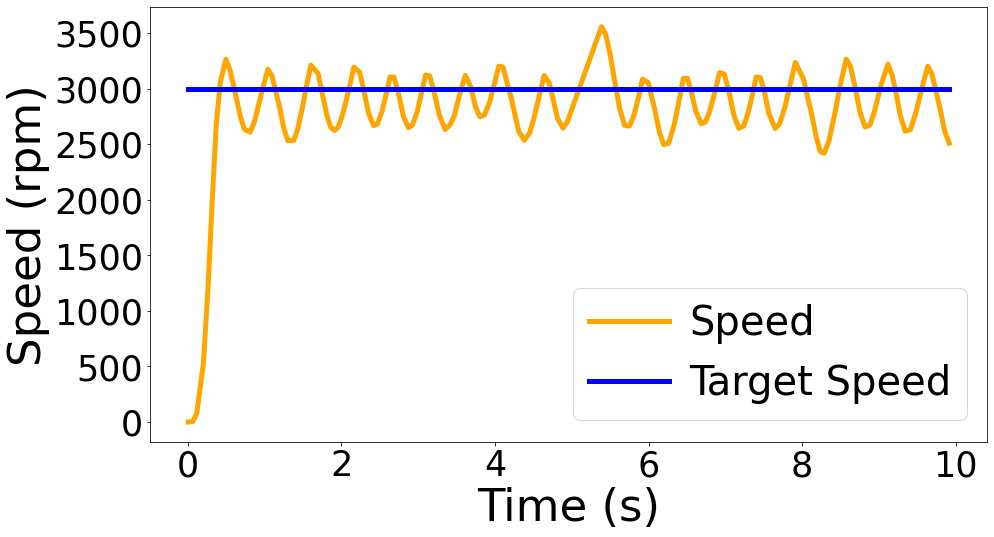

In [8]:
base_dir = "../logs/current_log/"
log_file = "motor_001.csv"

df = pd.read_csv(os.path.join(base_dir,log_file))

COLORS = ['orange', 'orchid', 'purple', 'blue', 'darksalmon']
MARKER_SIZE = 11
LINE_WIDTH = 5

TARGET_SPEED = 3000


fig, axes = plt.subplots(1, 1, figsize=(15, 8))

x = list(range(1,17))

PORTION = int(len(df["time"].values)*0.1)
print(PORTION)



# 折线图
axes.plot(df["time"].values[0:PORTION], df["speed"].values[0:PORTION], color='orange', label="Speed",  linewidth=LINE_WIDTH)
axes.plot(df["time"].values[0:PORTION], ([TARGET_SPEED]*len(df["speed"]))[0:PORTION], color='blue', label="Target Speed", linewidth=LINE_WIDTH, linestyle='-')
# 
plt.legend(loc=1, fontsize=40, bbox_to_anchor = (1,0.4), title_fontsize=25, columnspacing=1.2, handletextpad=0.5)

axes.grid(which='minor', c='lightgrey')

#设置坐标标签标注和字体大小
plt.xlabel("Time (s)",fontsize=45)
plt.ylabel("Speed (rpm)",fontsize=45)

#设置坐标刻度字体大小
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

# plt.title(f"speed")
plt.savefig(f"./delay_1ms.png",bbox_inches = 'tight')
plt.show()

In [34]:
import math
import scipy
import random

random.randrange(1,4)

# plt.subplot(121)
# hist, bin_edges = np.histogram([1,1,1,2,2,2,3,3], bins=10)
# cum = np.cumsum(hist)
# cdf = cum / cum[-1]

# plt.plot(bin_edges[:-1], cdf)
# np.mean([1,2,3])
min([1,2])

1

[  8   6  23  45  64 161 279 430 621 755]
[  4  15  29  72 149 205 289 322 366 385]
[87.6        88.83997407 90.07994815 91.31992222 92.5598963  93.79987037
 95.03984445 96.27981852 97.5197926  98.75976667 99.99974075]
[85.29192587 86.76230674 88.2326876  89.70306847 91.17344934 92.64383021
 94.11421107 95.58459194 97.05497281 98.52535367 99.99573454]
[0.00334448 0.00585284 0.01546823 0.03428094 0.06103679 0.12834448
 0.24498328 0.42474916 0.68436455 1.        ]
[0.00217865 0.01034858 0.02614379 0.06535948 0.14651416 0.25816993
 0.41557734 0.59095861 0.79030501 1.        ]


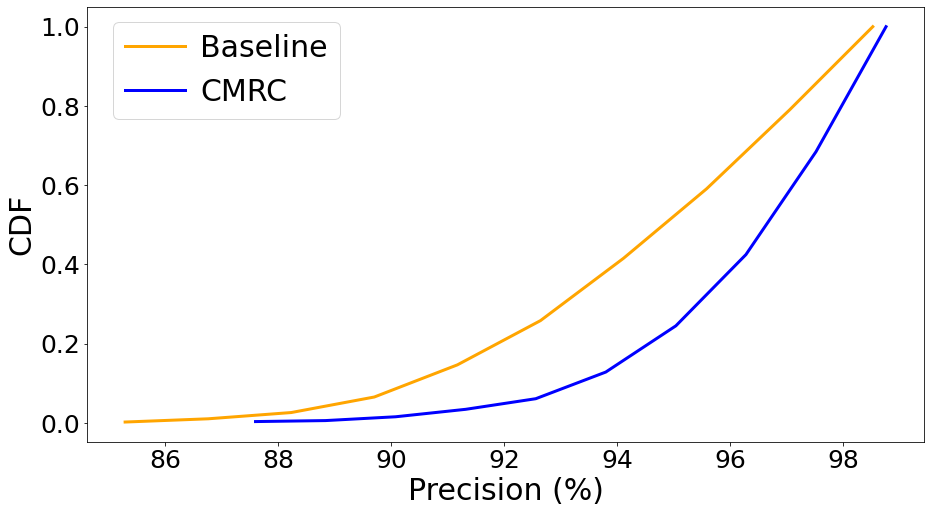

In [72]:

def limit(num, max_val, min_val):
    if(num>=max_val):
        return max_val
    elif(num<=min_val):
        return min_val
    else:
        return num

base_dir = "../logs/current_log/"
baseline_log = "motor_001_baseline.csv"
cmrc_log = "motor_001_cmrc_5.csv"
# cmrc_log = "motor_001.csv"

df = {}


df["baseline"] = pd.read_csv(os.path.join(base_dir,baseline_log))
df["cmrc"] = pd.read_csv(os.path.join(base_dir,cmrc_log))

COLORS = ['orange', 'orchid', 'purple', 'blue', 'darksalmon']
MARKER_SIZE = 11
LINE_WIDTH = 3

TARGET_SPEED = 3000

speeds = {}
precisions = {}
hist = {}
bin_edges = {}
cum = {}
cdf = {}

speeds["baseline"] =df["baseline"]["speed"].values
precisions["baseline"] = [(1-(abs(speeds["baseline"][i]-TARGET_SPEED)/TARGET_SPEED))*100 for i in range(10,len(df["baseline"])) ]
hist["baseline"], bin_edges["baseline"] = np.histogram(precisions["baseline"], bins=10)
cum["baseline"] = np.cumsum(hist["baseline"])
cdf["baseline"] = cum["baseline"] / cum["baseline"][-1]

speeds["cmrc"] =df["cmrc"]["speed"].values
precisions["cmrc"] = [limit((1-(abs(speeds["cmrc"][i]-TARGET_SPEED)/TARGET_SPEED))*100, 100, 87.6) for i in range(100,len(df["cmrc"])) ]
hist["cmrc"], bin_edges["cmrc"] = np.histogram(precisions["cmrc"], bins=10)
cum["cmrc"] = np.cumsum(hist["cmrc"])
cdf["cmrc"] = cum["cmrc"] / cum["cmrc"][-1]


print(hist["cmrc"])
print(hist["baseline"])
print(bin_edges["cmrc"])
print(bin_edges["baseline"])
print(cdf["cmrc"])
print(cdf["baseline"])

# print(len(precisions["cmrc"]))
# print(len(precisions["baseline"]))

fig, axes = plt.subplots(1, 1, figsize=(15, 8))

# x = list(range(1,17))

# 折线图
axes.plot(bin_edges["baseline"][:-1], cdf["baseline"], color='orange', label="Baseline",  linewidth=LINE_WIDTH)
axes.plot(bin_edges["cmrc"][:-1], cdf["cmrc"], color='blue', label="CMRC", linewidth=LINE_WIDTH, linestyle='-')
# 
plt.legend(loc=1, fontsize=30, bbox_to_anchor = (0.32,1), title_fontsize=30, columnspacing=1.2, handletextpad=0.5)

axes.grid(which='minor', c='lightgrey')

#设置坐标标签标注和字体大小
plt.xlabel("Precision (%)",fontsize=30)
plt.ylabel("CDF",fontsize=30)

#设置坐标刻度字体大小
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# plt.title(f"speed")
plt.savefig(f"./cdf_baseline.png",bbox_inches = 'tight')
plt.show()

In [56]:
server_log = "server_log.csv"
df = pd.read_csv(os.path.join(base_dir,server_log))

throughput = df["throughput"].values

avg_throughput = np.mean(throughput)

In [57]:
avg_throughput*100*8/10**3

648.9649484536083